In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### МНК
Ax = b  
$\hat{x} = (A^TA)^{-1}A^Tb$

In [3]:
def pseudo_inverse(A):
    A_tmp = np.dot(A.T, A)
    A_tmp = np.linalg.inv(A_tmp)
    return np.dot(A_tmp, A.T)

def fit_MNK(A, b):
    if A.shape[0] != b.shape[0]:
        print( "Error in shapes")
    else:
        return np.dot(np.linalg.pinv(A),b) # оказывается есть функция псевдообращения


In [4]:
A = np.array([[2,0],
              [-1,1],
              [0,2]])
b = np.array([1,0,-1]).reshape(3,1)
print(A.shape, b.shape)
x_hat = fit_MNK(A, b)
x_hat

(3, 2) (3, 1)


array([[ 0.33333333],
       [-0.33333333]])

#### Редукция
Ax = b  ,   $\hat{x} = x_0 + FA^T(AFA^T + \Sigma)^{-1}(b - Ax_0)$  
что за $\Sigma$ и F  ???

In [70]:
mas = np.array([1,2,4,5])
mas.mean()

3.0

In [126]:
fit_reduction(A, b, x, error).shape

(1000, 1000)

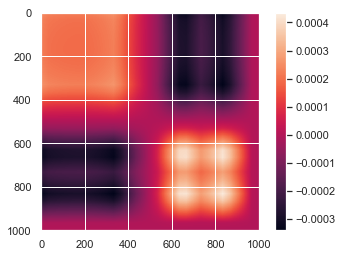

In [111]:
plt.imshow(correlation(b))
plt.colorbar()
#x_col = x_row.T
#np.mean((x_row-x_row.mean)*(x_col-x_col.mean))

In [156]:
#code here
def correlation(x):
    x_row = x.reshape(x.shape[0],1)
    x_col = x_row.T
    x_row = (x_row-x_row.mean())/x_row.std()**2
    x_col = (x_col-x_col.mean())/x_col.std()**2
    
    return x_row*x_col

def fit_reduction(A, b, x, error):
    F = correlation(x)
    #error = np.random.randn(b.shape[0])
    sigma = correlation(error)
    x_0 = x.mean()
    x_0 = np.full_like(x, x_0).reshape(x.shape[0], 1)
    b = b.reshape(b.shape[0],1)

    
    matrix_tmp = np.dot(A, np.dot(F, A.T) + sigma)
    matrix_tmp = np.linalg.inv(matrix_tmp)
    matrix_tmp = np.dot(A.T, matrix_tmp)
    
    x_hat = x_0 + np.dot(np.dot(F, matrix_tmp),(b - np.dot(A, x_0)))
    return x_hat
fit_reduction(A, b, x, error).shape

(1000, 1)

#### Сигнал и оператор свертки
Работаем со сверткой и с зубчитым сигналом. и Сравниваем два алгоритма

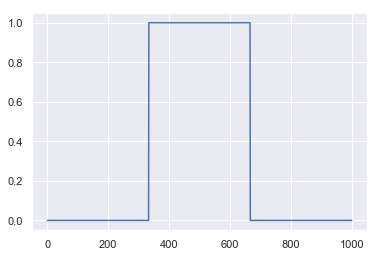

In [143]:

N = 1000
conv_fun = np.zeros(N)
conv_fun[int(N/3):int(2*N/3)] = 1
plt.plot(conv_fun)

In [144]:
# create convolutional operator
array = [0,0,1,1,0,0]
def array_shift(array, shift = 'right'):
    """смещаем массив в сторону, добавляя ноль"""
    if shift == 'right':
        return np.insert(array, 0, 0)[:-1] # add 0 in the beginning
    elif shift == 'left':
        return np.append(array, 0)[1:]
    else:
        print('Shift incorrect')

In [145]:
def build_conv_operator(conv_fun):
    
    N = conv_fun.shape[0]
    mas = np.zeros((N, N))
    
    # у нас ведь свертка а не кросс валидация, поэтому сделаем разворот.
    conv_fun =  np.flip(conv_fun)
    mas[N//2,:] = conv_fun
    for i in range(N//2, 0,-1):
        mas[i-1, :] = array_shift(mas[i, :], 'left')
    for i in range(N//2, N-1, 1):
        mas[i+1, :] = array_shift(mas[i, :], 'right')
    return mas
    
        

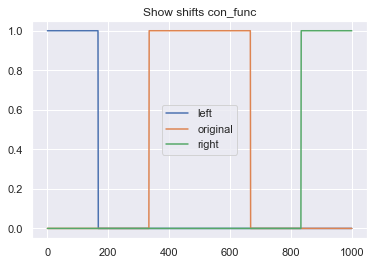

In [146]:
operator = build_conv_operator(conv_fun)

plt.title("Show shifts con_func")
plt.plot(operator[0,:], label = 'left')
plt.plot(operator[N//2,:], label = 'original')
plt.plot(operator[-1,:], label = 'right')
plt.legend()

In [147]:
def take_saw(N):
    # так и не понял зачем мне это
    mas=np.zeros(N)
    mas[:N//2] = np.linspace(0,1,N//2)
    mas[N//2:] = np.linspace(1,0,N//2)
    return mas

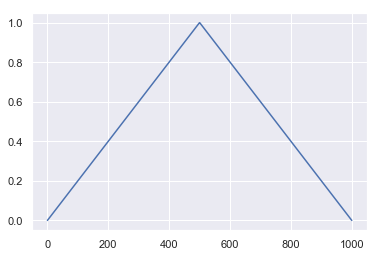

In [148]:
func = take_saw(N)
plt.plot(func)

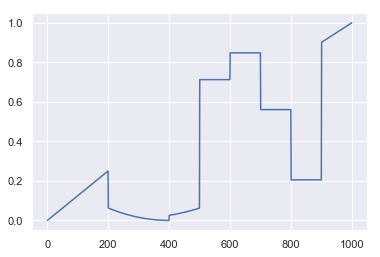

In [149]:
func = np.linspace(0,1,N) 
func[200:500]  = func[200:500]**2
func[:400] = take_saw(400)/4
for i in range(500, N-100, 100):
    func[i:i+100] = np.random.random()

func[200:500] *= func[200:500]
"""or i in range(num_heap):
    lenght = np.random.randint(jump)
    func[i*jump:i*jump+lenght] = np.linspace
"""
#func = func + np.random.randn(func.shape[0])/100
#func = np.sin(np.linspace(0,10,N))
plt.plot(func)

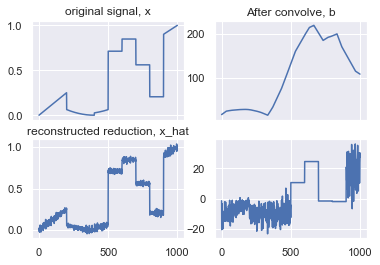

In [155]:
x = func
A = build_conv_operator(conv_fun)
b = np.dot(A, x)
error = np.random.randn(func.shape[0])/100
b += error


x_hat = fit_MNK(A, b)
x_hat_2 = fit_reduction(A, b, x, error)

fig, ax = plt.subplots(2,2, sharex=True)
ax[0,0].set_title('original signal, x')
ax[0,0].plot(x)

ax[0,1].set_title('After convolve, b')
ax[0,1].plot(b)

ax[1,0].set_title('reconstructed MSE, x_hat')
ax[1,0].plot(x_hat)

ax[1,0].set_title('reconstructed reduction, x_hat')
ax[1,1].plot(x_hat_2)

#plt.title('predict')
#plt.plot(x_hat) ## some noise it is very bad. Because bad signals with hopping


